## RNN model fitting

This notebook contains the fitting of the Recurrent Neural Network with LSTM cells to all series in the dataset at the same time.

In [1]:
import os
import sys
import pickle
import pandas as pd
import matplotlib.pyplot as plt

src_path = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(src_path)

from RNN.model_selection import RNNHyperTune
from RNN.data_processing import window_dataset
from DataSimulation.utils import plot_fit

In [2]:
data = pd.read_csv('data.csv', header=None)
data.head()

0    1     2     3     4     5     6      7     8      9   ...   90    91  \
0  6.0  3.0   6.0  95.0   7.0  34.0  63.0  354.0   5.0  152.0  ...  6.0  19.0   
1  6.0  3.0   5.0  83.0   3.0  32.0  63.0  352.0   5.0  150.0  ...  2.0  14.0   
2  5.0  3.0   8.0  83.0   4.0  33.0  71.0  343.0  10.0  152.0  ...  0.0  21.0   
3  8.0  3.0  10.0  98.0   9.0  37.0  66.0  339.0   4.0  167.0  ...  2.0  16.0   
4  6.0  5.0   7.0  85.0  12.0  28.0  61.0  324.0   2.0  169.0  ...  0.0  18.0   

     92     93    94    95    96    97    98   99  
0  23.0  217.0  34.0   9.0   6.0   5.0  24.0  7.0  
1  24.0  215.0  32.0   6.0  10.0  10.0  22.0  8.0  
2  24.0  226.0  36.0   8.0   5.0  10.0  24.0  8.0  
3  18.0  225.0  40.0  10.0   9.0  13.0  21.0  7.0  
4  17.0  208.0  39.0  14.0   6.0  10.0  20.0  9.0  

[5 rows x 100 columns]

In [3]:
test_size = 12
train_data = data.iloc[:-test_size, :].to_numpy()
test_data = data.iloc[-test_size:, :].to_numpy()
print(train_data.shape)
print(test_data.shape)

(188, 100)
(12, 100)


In [4]:
parameters = {
    'lstm_units':[8,16,32],
    'learning_rate':[0.1, 0.01, 0.001, 0.0001],
    'batch_size':[8,16,32],
}
rnn_hypertune = RNNHyperTune(100, 12, parameters)

In [5]:
rnn_model, scaler = rnn_hypertune.fit(
    data=train_data,
    checkpoint_path=os.path.join(os.getcwd(), 'checkpoint'),
    epochs=500
)

Training model 0/144.
minimum 0 model's validation loss: 0.059518564492464066.
Training model 1/144.
minimum 1 model's validation loss: 0.10481875389814377.
Training model 2/144.
minimum 2 model's validation loss: 0.056166037917137146.
Training model 3/144.
minimum 3 model's validation loss: 0.058581721037626266.
Training model 4/144.
minimum 4 model's validation loss: 0.05445525795221329.
Training model 5/144.
minimum 5 model's validation loss: 0.0496649332344532.
Training model 6/144.
minimum 6 model's validation loss: 0.060583580285310745.
Training model 7/144.
minimum 7 model's validation loss: 0.04611770436167717.
Training model 8/144.
minimum 8 model's validation loss: 0.0684342011809349.
Training model 9/144.
minimum 9 model's validation loss: 0.11097801476716995.
Training model 10/144.
minimum 10 model's validation loss: 0.059936150908470154.
Training model 11/144.
minimum 11 model's validation loss: 0.050147462636232376.
Training model 12/144.
minimum 12 model's validation los

tiempo: 150m, 21.3s

In [6]:
rnn_model.summary()

Model: "sequential_145"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_218 (LSTM)             (None, 12, 32)            17024     
                                                                 
 lstm_219 (LSTM)             (None, 12, 32)            8320      
                                                                 
 dense_145 (Dense)           (None, 12, 100)           3300      
                                                                 
Total params: 28,644
Trainable params: 28,644
Non-trainable params: 0
_________________________________________________________________


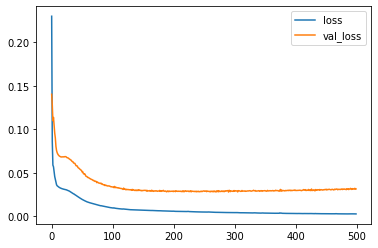

In [7]:
df = pd.DataFrame(rnn_hypertune.history.history)
df.plot(y=['loss', 'val_loss'])
plt.show()

In [8]:
scaled_data = scaler.transform(data)

In [9]:
eval_ds = window_dataset(
    data=scaled_data,
    sequence_lenght=12,
    output_lenght=12,
    batch_size=scaled_data.shape[0],
    shift=1,
    shuffle=False    
)

In [10]:
fit_values = rnn_model.predict(eval_ds)
fit_0 = fit_values[:,0,:]

1/1 [==============================] - 1s 739ms/step


In [11]:
orig_scale = scaler.inverse_transform(fit_0)

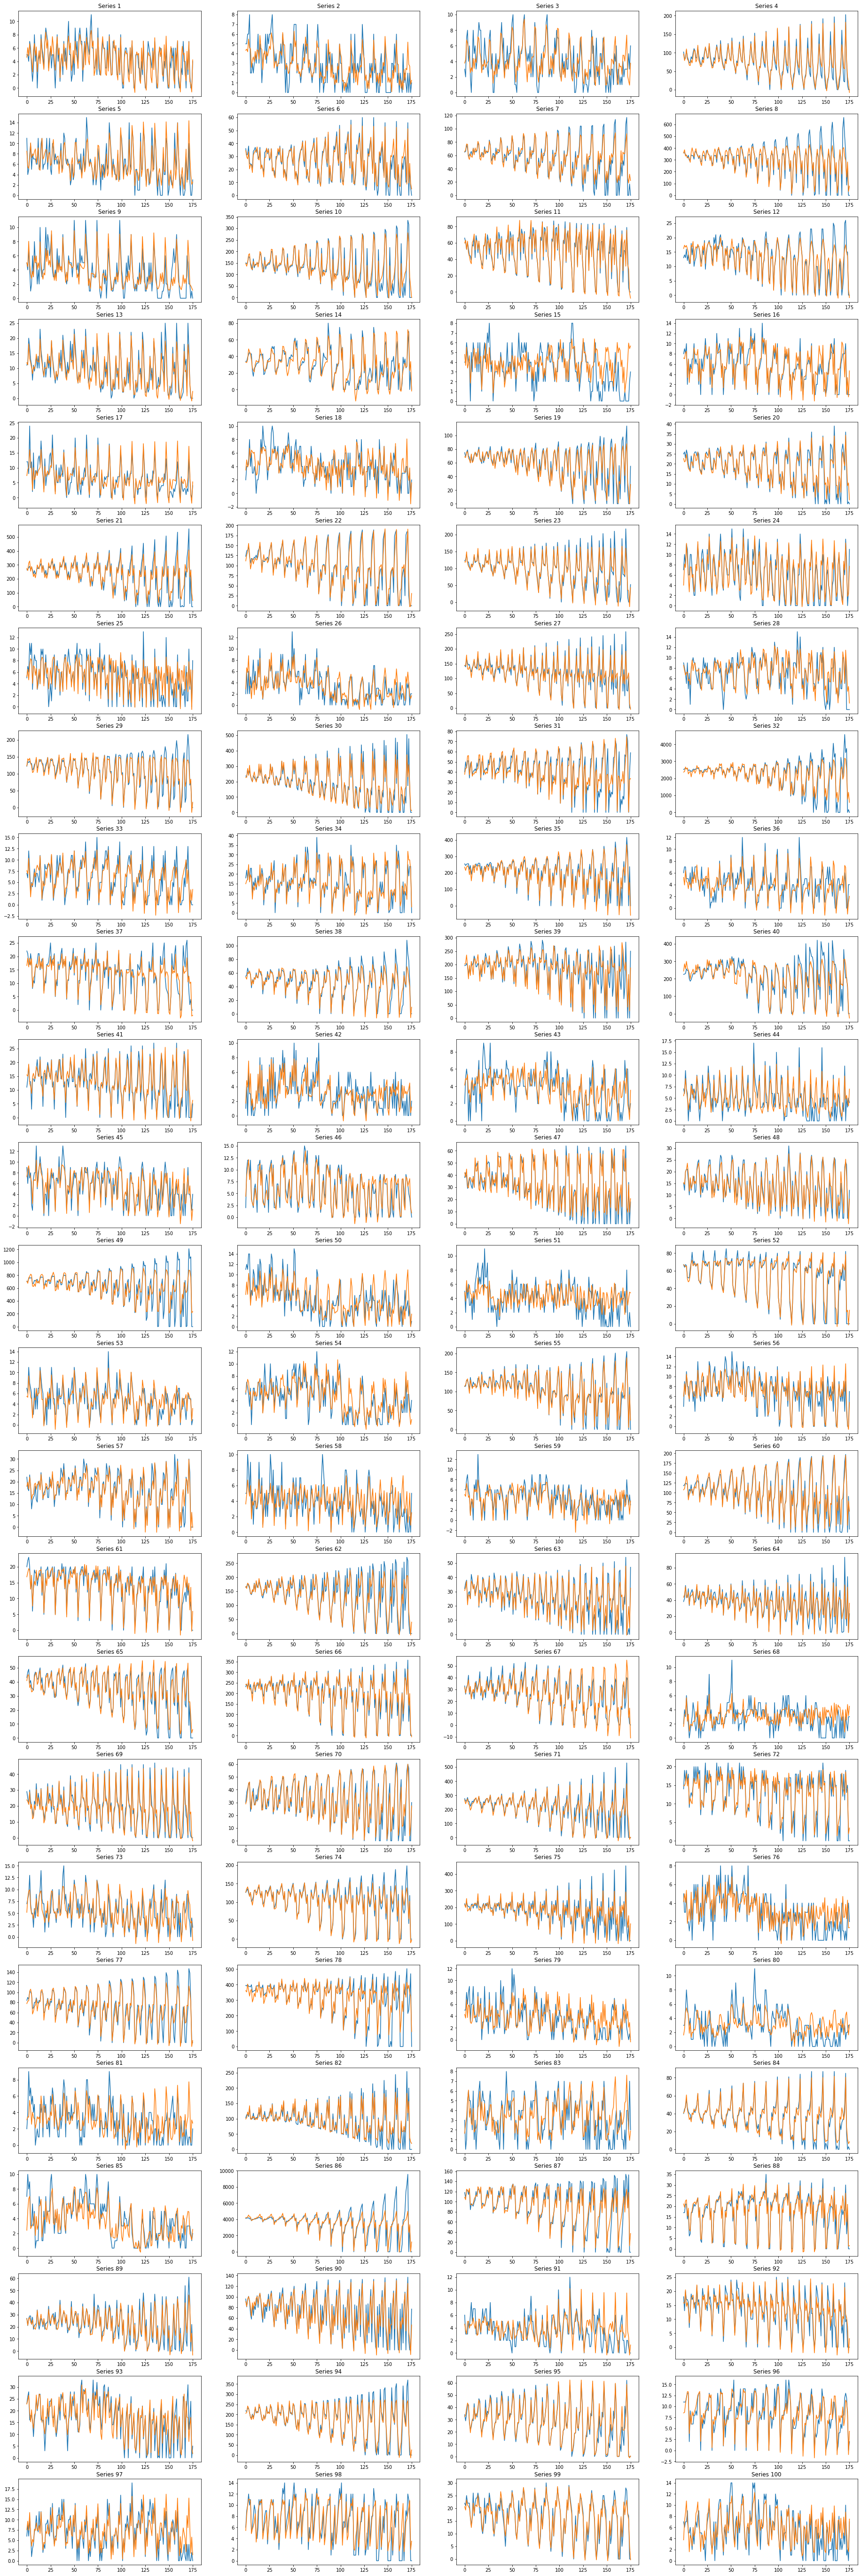

In [12]:
plot_fit(train_data[12:], orig_scale[:-1])

In [13]:
rnn_model.save("rnn.h5")

In [14]:
with open("rnn_scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)